<img src="../Img/banner-fa-49-2.png">
<p>5 октября 2021 года, ВМ/451 (ул. Верхняя Масловка, д. 15)</p>

# Тема 6. Корреляционно-регрессионный анализ  с помощью Python

Студенты: Поток: УЦИ20-1<br>
Преподаватель: Смирнов Михаил Викторович, доцент Департамента Анализа данных и машинного обучения Финансового университета при Правительстве Российской Федерации

Задача. Построить линейную и нелинейную регрессионные модели зависимости цены закрытия акций Сбербанка от цены закрытия акций Газпрома. Сравнить результаты.

Решение

# Линейная модель

Получим данные об изменении цены акций Газпрома и Сбербанка на сайте <a href=http://finam.ru>finam.ru</a>. Для этого в разделе технического анализа сайта заполним форму и получим данные за один и тот же период в двух файлах: отдельно для Газпрома и для Сбербанка.

<img src="../Img/Finam.png" style="width:60%">

Импортируем необходимые библиотеки и загрузим данные в таблицу Pandas. Распечатаем первые три строки.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

gazp=pd.read_csv("../Data/GAZP_210801_211001.csv",sep=";")
sber=pd.read_csv("../Data/SBER_210801_211001.csv",sep=";")
data=pd.concat([gazp[["<DATE>","<TICKER>","<CLOSE>"]],sber[["<TICKER>","<CLOSE>"]]],axis=1)
data.head(3)

,<DATE>,<TICKER>,<CLOSE>,<TICKER>,<CLOSE>
0,02/08/21,GAZP,286.75,SBER,306.51
1,03/08/21,GAZP,287.09,SBER,309.89
2,04/08/21,GAZP,287.94,SBER,311.10


Построим регрессионную модель $\hat{y}=f(x)$, где $x$ - фактор, а $\hat{y}$ - результирующий признак. Для наглядности переименуем столбцы таблицы, добавив метки "X" к именам атрибутов акций Газпрома, и метки "Y" к именам атрибутов акций Сбербанка.

In [2]:
data.columns=["<DATE>", "X_TICKER", "X_CLOSE", "Y_TICKER", "Y_CLOSE"]
data.head(3)

,<DATE>,X_TICKER,X_CLOSE,Y_TICKER,Y_CLOSE
0,02/08/21,GAZP,286.75,SBER,306.51
1,03/08/21,GAZP,287.09,SBER,309.89
2,04/08/21,GAZP,287.94,SBER,311.10


Отобразим краткую информацию о полученной таблице

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <DATE>    45 non-null     object 
 1   X_TICKER  45 non-null     object 
 2   X_CLOSE   45 non-null     float64
 3   Y_TICKER  45 non-null     object 
 4   Y_CLOSE   45 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.9+ KB


Построим линейную модель регрессии вида $\hat{y}=a+b\cdot{x}$. Найдем параметры $a$ и $b$ модели по формулам:

$$a=\bar{y}-b\cdot{\bar{x}}$$

$$b=\frac{Cov(x,y)}{D(x)}$$

где $Cov(x,y)$ - ковариация цены акции Газпрома и цены акции Сбербанка в рассмотренном периоде, $D(x)$ - дисперсия цены акции Газпрома.

Найдем ковариационную матрицу

In [4]:
cov_matrix=np.cov(data["X_CLOSE"],data["Y_CLOSE"])
print(cov_matrix)

[[612.83103737  73.57868005]
 [ 73.57868005  43.00411343]]


Найдем ковариацию $X,Y$ и дисперсию $X$.

In [5]:
cov_xy=cov_matrix[0,1]
disp_x=cov_matrix[0,0]

Найдем параметры $a$ и $b$.

In [6]:
b=cov_xy/disp_x
a=data["Y_CLOSE"].mean()-b*data["X_CLOSE"].mean()
print(f"(a, b) = {(a,b)}")

(a, b) = (289.3105130612969, 0.1200635665677502)


Для каждого $x$ найдем теоретическое значение $\hat{y}$ результирующего признака.

In [7]:
Y_HAT_CLOSE=np.array(a+b*data["X_CLOSE"])

Построим диаграмму, на которой отобразим линейную регрессионную модель. Причем, график модели построим по двум точкам - минимального и максимального  $\hat{y}$.

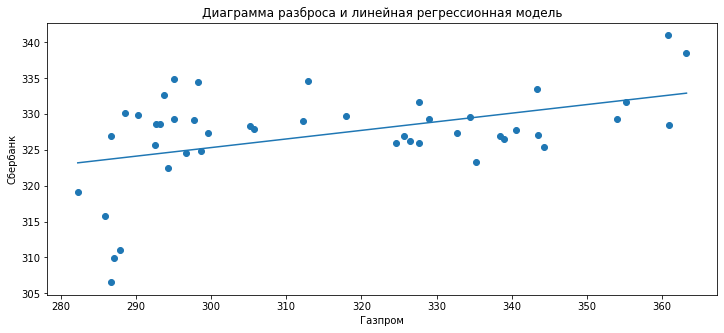

In [8]:
x_min,x_max=data["X_CLOSE"].min(),data["X_CLOSE"].max()
y_hat_min,y_hat_max=Y_HAT_CLOSE.min(),Y_HAT_CLOSE.max()

plt.figure(figsize=(12,5))
plt.title("Диаграмма разброса и линейная регрессионная модель")
plt.scatter(data["X_CLOSE"],data["Y_CLOSE"])
plt.plot((x_min,x_max),(y_hat_min,y_hat_max))
plt.xlabel("Газпром")
plt.ylabel("Сбербанк");

Оценим качество модели на основании расчета величины коэффициента достоверности аппроксимации $R^{2}$.

$$R^2=\frac{D(y)-D(y-\hat{y})}{D(y)}$$

In [9]:
r_square=(data["Y_CLOSE"].std()**2-(data["Y_CLOSE"]-Y_HAT_CLOSE).std()**2)/data["Y_CLOSE"].std()**2
r_square

0.20542497088560038

Чем ближе $R^{2}$ к единице, тем выше качество модели. Мы получили довольно низкое качество.

# Нелинейная модель

Построим нелинейную модель в форме параболы третьей степени $$\hat{y}=a+b\cdot{x}+c\cdot{x^2}+d\cdot{x^3}$$

В качестве фактора мы выбрали Газпром. Поэтому для нелинейной модели нам понадобятся значения цены акций Газпрома в квадрате и в третьей степени. Составим матрицу из четырёх столбцов. Первый столбец будет состоять из единиц (цена в нулевой степени), второй столбец из значений цены акций Газпрома, третий столбец - это цена в квадрате, четветртый столбец - цена
в третьей степени. Строк в матрице будет столько же, сколько и строк в таблице *data*. Получить число строк таблицы *pandas* можно, обратившись к ее свойству *shape*, например, `data.shape`

Сформируем указанные массивы чисел.

In [10]:
c1=np.ones(data.shape[0])
c2=data["X_CLOSE"]
c3=data["X_CLOSE"]**2
c4=data["X_CLOSE"]**3

Объединим указанные массивы в матрицу $X$.

In [11]:
X=np.stack((c1,c2,c3,c4),axis=1)

Вектор $w=(a,b,c,d)$ парметров модели найдем по формуле

$$
w=(X^{T}X)^{-1}X^{T}Y
$$

где $Y$ - массив значений моделируемого признака, т.е. массив значений цены акции Сбербанка.

In [12]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),data["Y_CLOSE"])
print(w)

[-1.04474780e+04  9.99320111e+01 -3.08210511e-01  3.16161417e-04]


Составим массив модельных значений.

In [13]:
Y_HAT_CLOSE=w[0]*c1+w[1]*c2+w[2]*c3+w[3]*c4

Построим график. Причем, модельные значения на графике сформируем по точкам горизонтальной оси от минимальной до максимальной цены акции Газпрома с шагом в 1 рубль. Обозначим $h$ - диапазон значений цены по горизонтальной оси, $v$ - модельные значения параболы по вертикальной оси.

In [14]:
h=np.arange(data["X_CLOSE"].min(),data["X_CLOSE"].max())
v=w[0]+w[1]*h+w[2]*h**2+w[3]*h**3

Теперь построим диаграмму разброса, на которую поместим модельные значения.

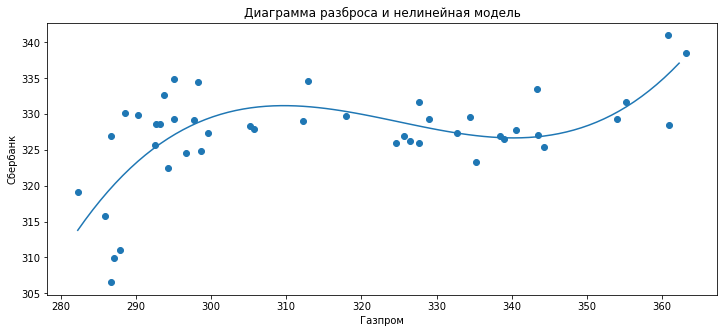

In [15]:
plt.figure(figsize=(12,5))
plt.title("Диаграмма разброса и нелинейная модель")
plt.scatter(c2,data["Y_CLOSE"])
plt.plot(h,v)
plt.xlabel("Газпром")
plt.ylabel("Сбербанк");

Оценим качество нелинейной модели с помощью $R^{2}$.

In [16]:
r_square=(data["Y_CLOSE"].std()**2-(data["Y_CLOSE"]-Y_HAT_CLOSE).std()**2)/data["Y_CLOSE"].std()**2
r_square

0.4660646859136122

Коэффициент $R^{2}$ нелинейной модели, хотя и остается достаточно низким, всё-таки выше по сравнению с таким же коэффициентом линейной модели.

<p style="font-size:125%; color:green"> Вывод. </p>
Нелинейная модель в форме параболы третьей степени луше моделирует возможную функциональную зависимость цены акций Сбербанка от цены акций Газпрома в рассмотренном временном интервале.